In [1]:
## Import all the necessary Libraries

import os
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
## Loading the Dataset

df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print(f"No of rows: {df.shape[0]}")
print(f"No of columns: {df.shape[1]}")

No of rows: 284807
No of columns: 31


In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [8]:
## Check for Null values

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
## Check for Duplicate rows
df.duplicated().sum()

1081

In [10]:
print(f"No of rows before removing duplicate: {df.shape[0]}")
print(20*"===")
df= df.drop_duplicates()
print(f"No of rows after removing duplicate: {df.shape[0]}")

No of rows before removing duplicate: 284807
No of rows after removing duplicate: 283726


## Outliers treatment
### We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

## Exploratory data Analysis - Visualizations

In [11]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Observe the distribution of classes with time

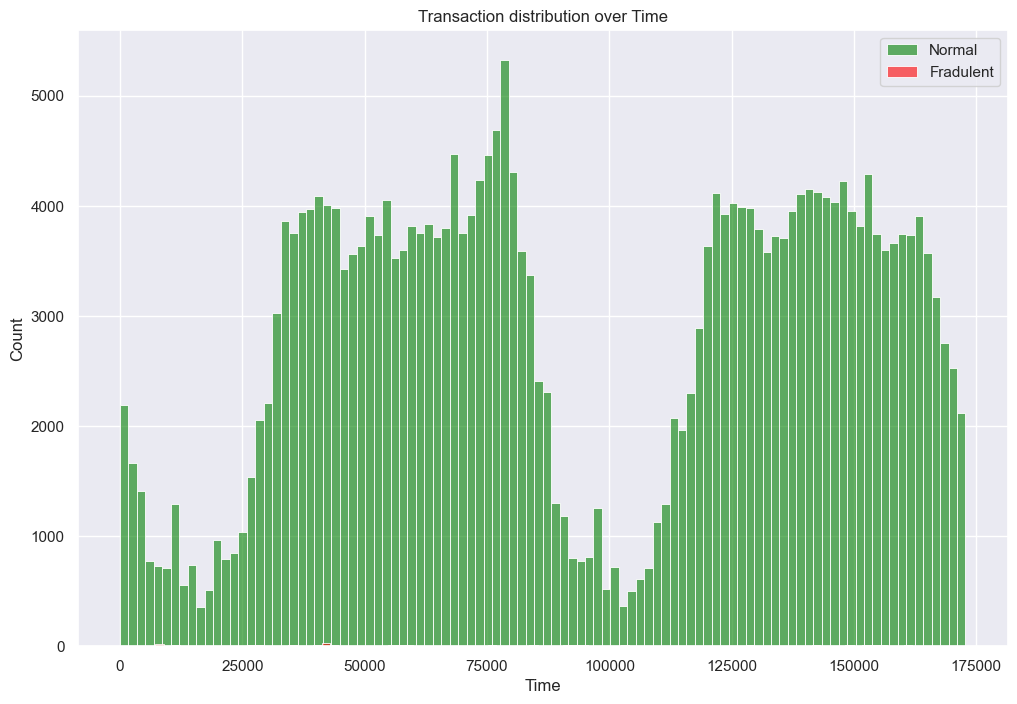

In [12]:
plt.figure(figsize=(12,8))
sns.histplot(data = df[df['Class']==0], x='Time', color='green', bins=100, label='Normal', alpha=0.6)
sns.histplot(data = df[df['Class']==1], x='Time', color='red', bins=100, label='Fradulent', alpha=0.6)
plt.legend()
plt.title("Transaction distribution over Time")
plt.show()

In [13]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

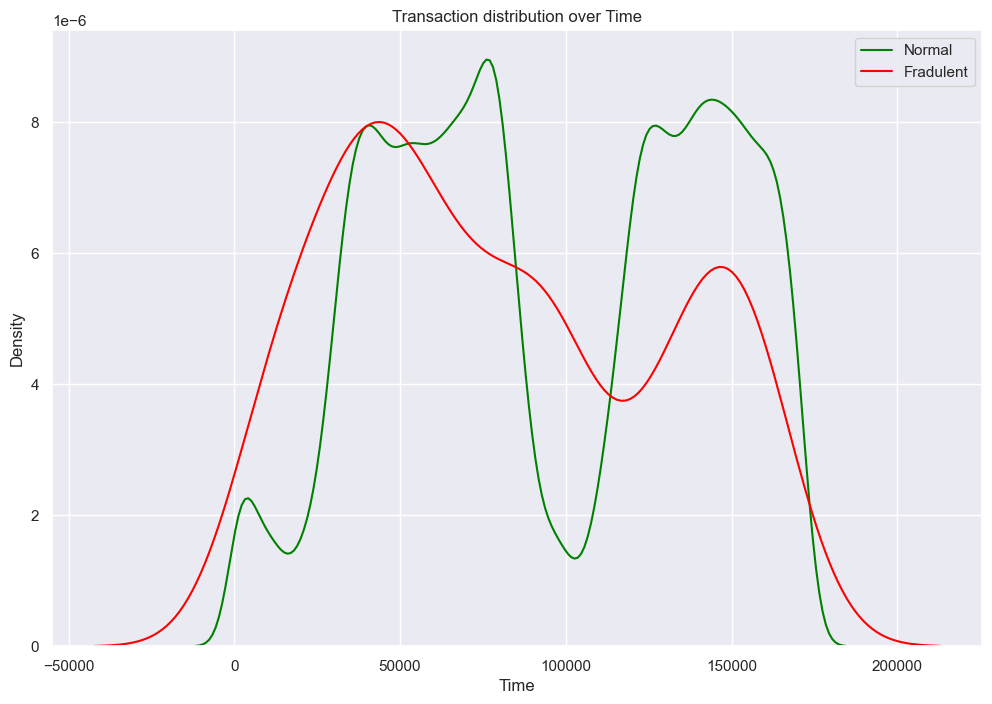

In [14]:
plt.figure(figsize=(12,8))
sns.distplot(data_non_fraud['Time'], color='green', bins=100, label='Normal', hist=False)
sns.distplot(data_fraud['Time'],color='red', bins=100, label='Fradulent', hist=False)
plt.legend()
plt.title("Transaction distribution over Time")
plt.show()

### Analysis:: 
#### We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. Hence, we can drop the Time column.

In [15]:
## Dropping the Time Column
df.drop('Time', axis = 1, inplace=True)

In [16]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Observe Distribution of Class with Respect to Amount

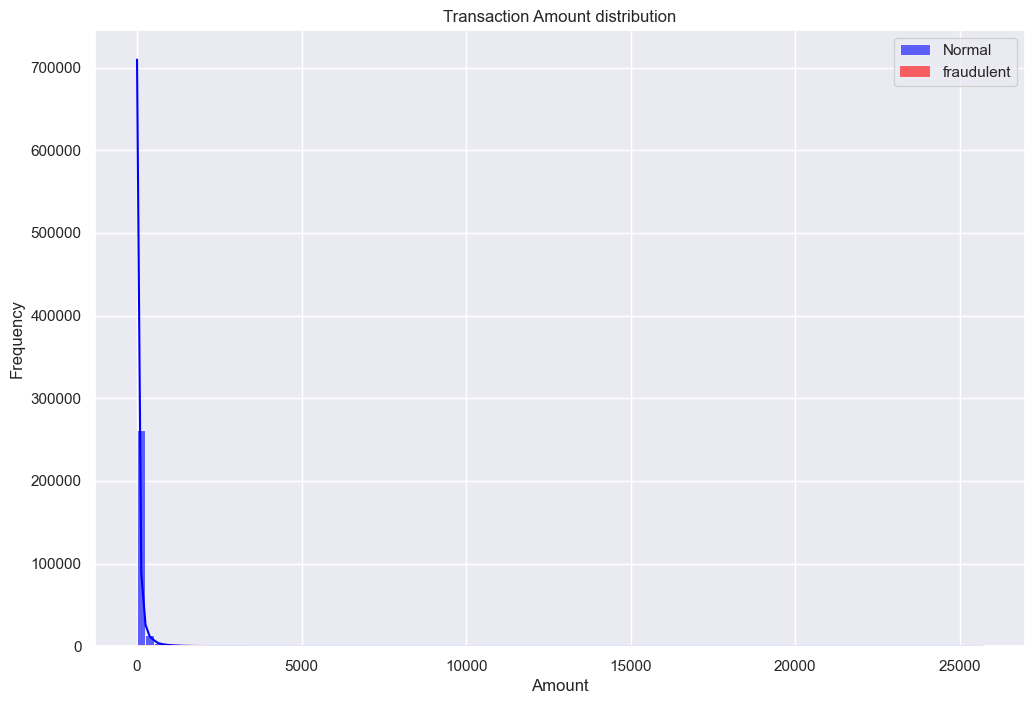

In [17]:
plt.figure(figsize=(12,8))
sns.histplot(data = df[df['Class']==0], x='Amount', color='blue', bins=100, label='Normal', alpha=0.6, kde= True)
sns.histplot(data = df[df['Class']==1], x='Amount', color='red', bins=100, label='fraudulent', alpha=0.6, kde= True)
plt.legend()
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title("Transaction Amount distribution")
plt.show()

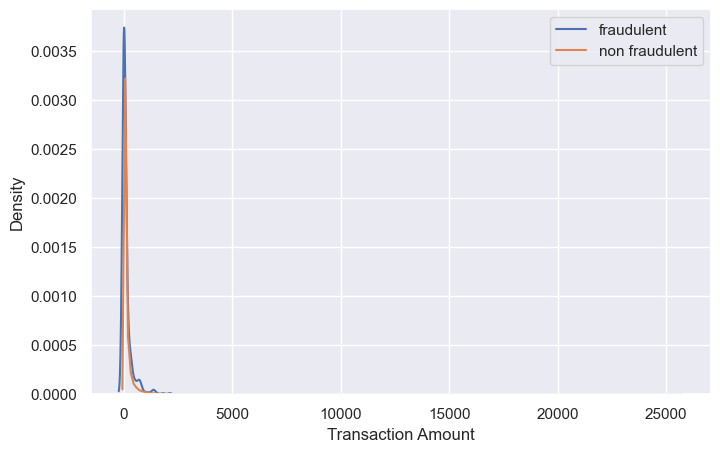

In [18]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.kdeplot(data=data_fraud['Amount'], label='fraudulent')
ax = sns.kdeplot(data=data_non_fraud['Amount'], label='non fraudulent')
ax.set(xlabel='Transaction Amount')
ax.legend()
plt.show()

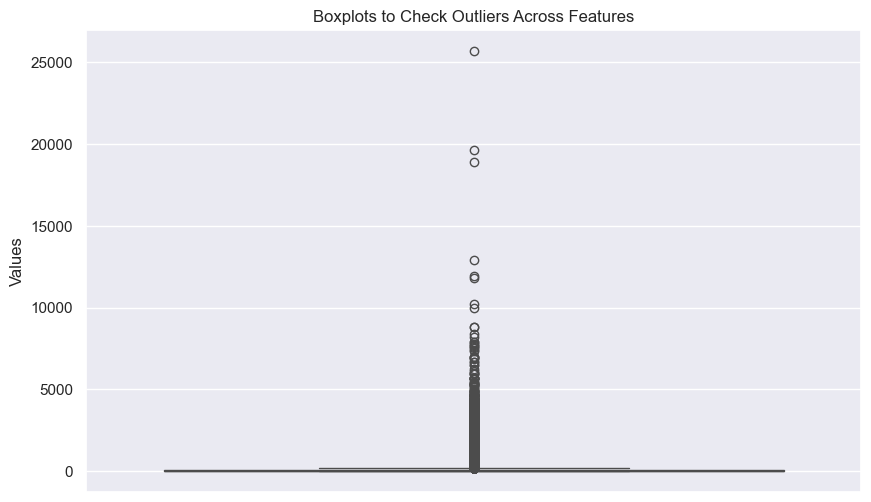

In [19]:
# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Amount'])

# Customize the plot
plt.title('Boxplots to Check Outliers Across Features')
plt.ylabel('Values')

plt.show()

### Analysis
#### We can see that the fraudulent and non-fraudulent transactions are mostly densed in the lower range of amount

## Correlation Matrix

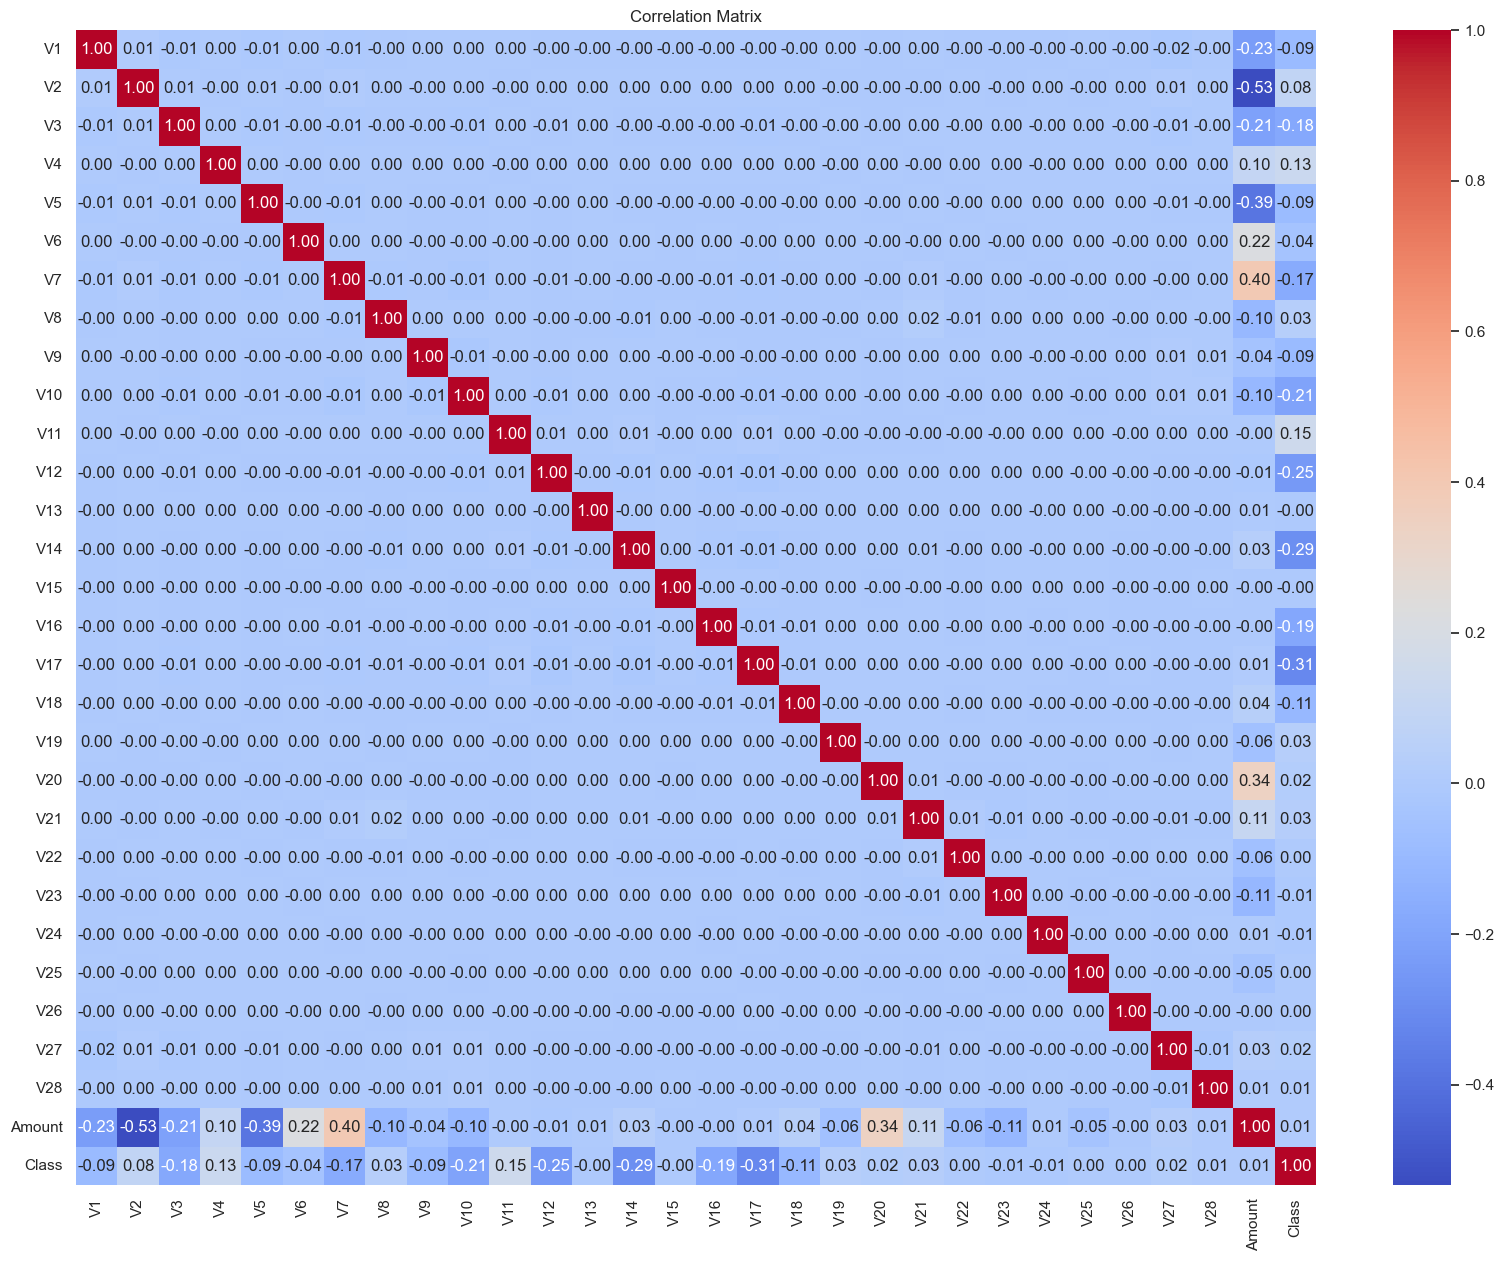

In [20]:
cm = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cm, cmap='coolwarm', annot= True, fmt = '.2f')
plt.title("Correlation Matrix")
plt.show()

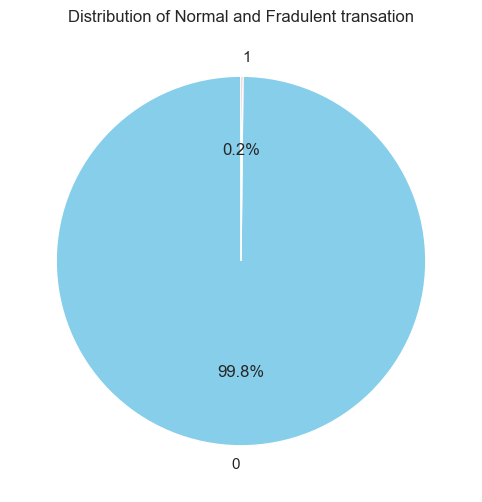

In [21]:
# Create a figure for the pie chart with a specified size (width=10, height=6)
plt.figure(figsize=(10, 6))

# Plot the distribution of the 'loan_status' column as a pie chart
# - value_counts() counts the number of occurrences of each category
# - kind='pie' specifies the chart type
# - autopct='%1.1f%%' displays percentages with 1 decimal place
# - startangle=90 rotates the chart for better orientation
# - colors assigns custom colors to the slices
df['Class'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral']
)

# Set the title of the pie chart
plt.title('Distribution of Normal and Fradulent transation')

# Remove the y-axis label for a cleaner look (not needed in pie charts)
plt.ylabel('')

# Display the chart
plt.show()

## Feature selection

In [22]:
## Putting features variables into x
x = df.drop('Class', axis=1)

In [23]:
## Putting target variables 'Class' into y
y = df['Class']

In [24]:
print(f"Shape of feature variables: {x.shape}\n")
print(f"Shape of target variable: {y.shape}\n")

Shape of feature variables: (283726, 29)

Shape of target variable: (283726,)



In [25]:
Classes = df['Class'].value_counts()
Classes

Class
0    283253
1       473
Name: count, dtype: int64

In [26]:
normal_transaction = round(Classes[0]/len(df['Class'])*100,2)
normal_transaction

99.83

In [27]:
fraud_transaction = round(Classes[1]/len(df['Class'])*100,2)
fraud_transaction

0.17

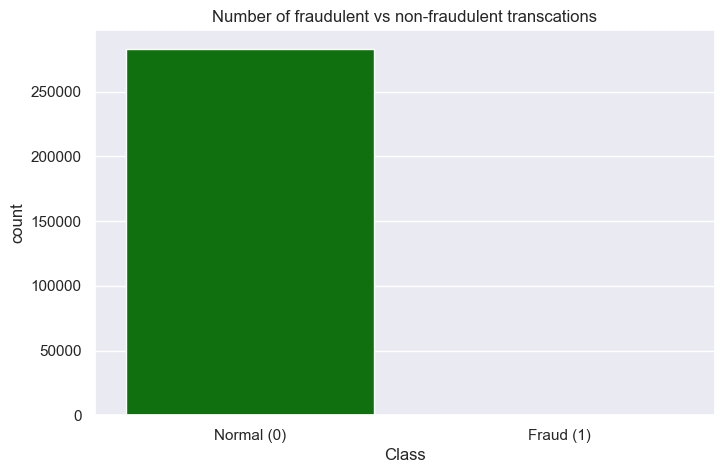

In [28]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=df, color='green')
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.xticks(ticks=[0, 1], labels=['Normal (0)', 'Fraud (1)'])
plt.show()

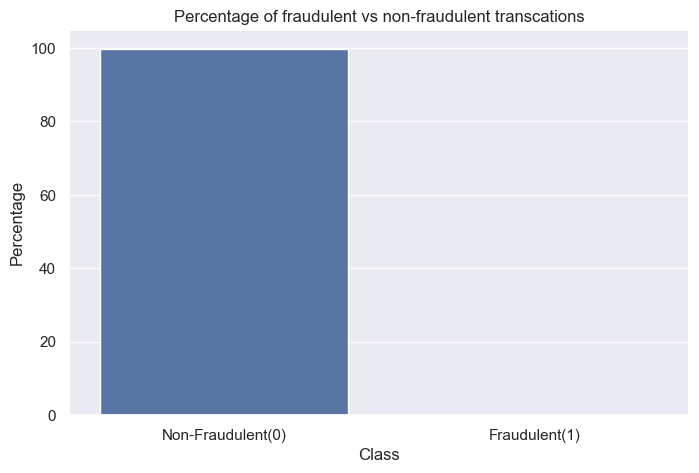

In [29]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_percentage = {'Class':['Non-Fraudulent(0)', 'Fraudulent(1)'], 'Percentage':[normal_transaction, fraud_transaction]} 
plt.figure(figsize=(8, 5))
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

### From the above analysis, it seems data is highly imbalanced. We will have to balance the data using a sampling technique, either via the SMOTE technique, which is used for oversampling or undersampling the data which is not recommended as we loss the important information from the data. 

In [30]:
## Applying Smote for Balancing Dataset

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resample, y_resample = smote.fit_resample(x, y)
print(f"Oringinal Data shape: {y.value_counts()}, ")
print(20*"===")
print(f"Resampled Data shape: {y_resample.value_counts()}, ")

Oringinal Data shape: Class
0    283253
1       473
Name: count, dtype: int64, 
Resampled Data shape: Class
0    283253
1    283253
Name: count, dtype: int64, 


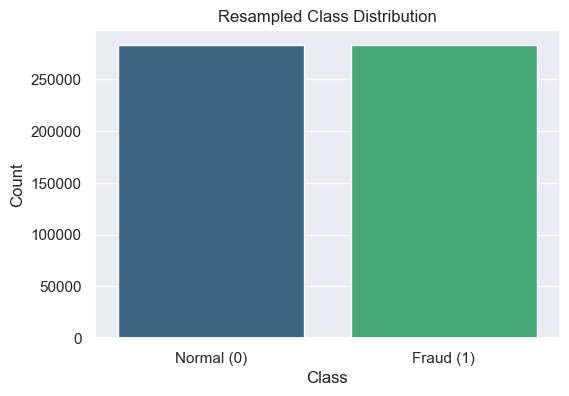

In [31]:

plt.figure(figsize=(6, 4))
sns.countplot(x=y_resample, palette='viridis')
# Set the title of the plot
plt.title('Resampled Class Distribution')
# Label the x-axis
plt.xlabel('Class')
# Label the y-axis
plt.ylabel('Count')
# Added custom x-axis labels
plt.xticks(ticks=[0, 1], labels=['Normal (0)', 'Fraud (1)'])
# Display the plot
plt.show()

In [32]:
## Splitting the data into Train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.2, random_state=42)

## Normalisation/Encoding the data

In [33]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Since All the independent variables (V1 to V28) are already scaled, we will be ignoring them and will be applying StandardScaler only on Amount variable for scaling

In [34]:
# Standardization method
from sklearn.preprocessing import StandardScaler

## Instatiate Scaler
scaler  = StandardScaler()

### Peform Scaling on the training data
x_train['Amount'] = scaler.fit_transform(x_train[['Amount']])

In [35]:
x_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
303464,-20.491668,10.177620,-19.836294,6.772901,-14.947471,-2.015566,-21.474064,0.360877,-8.726277,-18.024138,...,0.657939,-2.343936,0.692543,-0.230405,0.516297,-0.135520,0.070353,-3.674261,-0.998549,-0.415528
1934,-1.930422,1.778782,0.411402,-0.869500,-0.615354,-0.534365,-0.149129,0.955953,0.037004,-0.085711,...,0.014952,-0.105609,-0.447741,0.000562,0.006215,-0.100401,0.284431,-0.026413,0.162983,-0.415835
342085,-2.340418,3.256150,-4.419929,5.126404,-0.277031,-1.429801,-3.389524,1.735894,-3.427997,-5.529717,...,0.190999,0.677859,-0.365587,-0.455580,-0.483486,0.504402,0.047080,0.541778,0.168194,-0.416280
224383,-0.837795,0.482916,1.076006,-0.803303,0.885261,-0.465094,0.137538,0.215071,0.405346,-1.397095,...,0.274181,-0.319916,-0.944909,-0.125713,0.338428,0.536697,-0.142888,0.183155,0.049323,-0.389223
479262,-21.048108,15.351192,-22.609751,11.295540,-15.329527,1.409236,-29.704159,-15.041252,-9.570195,-19.212085,...,4.472514,-9.649132,4.113414,2.638643,0.298109,-1.328859,-0.122847,-4.288448,-0.544701,-0.412397


In [36]:
## We don't fit the Scaler on the test dataset, We only transform the test set.
x_test['Amount'] = scaler.transform(x_test[['Amount']])

In [37]:
x_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
554816,-1.006369,1.724394,-1.524947,1.363290,-0.499677,-1.451328,-1.772387,0.611825,-1.644311,-3.782689,...,0.263878,0.509839,-0.042088,-0.251287,-0.101973,0.399857,-0.314954,0.565676,0.294058,-0.416008
19821,-0.923736,1.108088,1.560499,-0.268841,0.075925,-0.230605,0.703012,0.024225,-0.071223,0.652308,...,0.353115,-0.259255,-0.387702,0.007894,0.186998,-0.262051,0.053898,0.331941,0.015959,-0.348352
184234,-1.431701,-1.397938,-1.991814,-2.281973,3.728501,2.114475,-0.799982,1.200862,-1.737078,-0.126943,...,-0.124045,-0.129716,-0.739275,-0.161992,0.695171,0.388090,0.075462,-0.123091,-0.376603,-0.416034
503641,-2.871611,1.402482,-3.121851,3.300926,-5.606257,2.093953,-0.463377,-3.477143,-1.037549,-4.302810,...,-0.344648,-0.453418,-0.116170,-4.203326,0.540360,-0.904229,-0.207258,1.470612,-0.301643,4.956849
261118,-1.330448,1.119757,-2.572612,1.622074,0.970933,-1.086979,0.505613,0.616914,-0.848251,-0.958868,...,-0.206425,0.032702,0.070120,-0.262940,-0.588721,0.233772,-0.384721,-0.089859,-0.319339,-0.251794


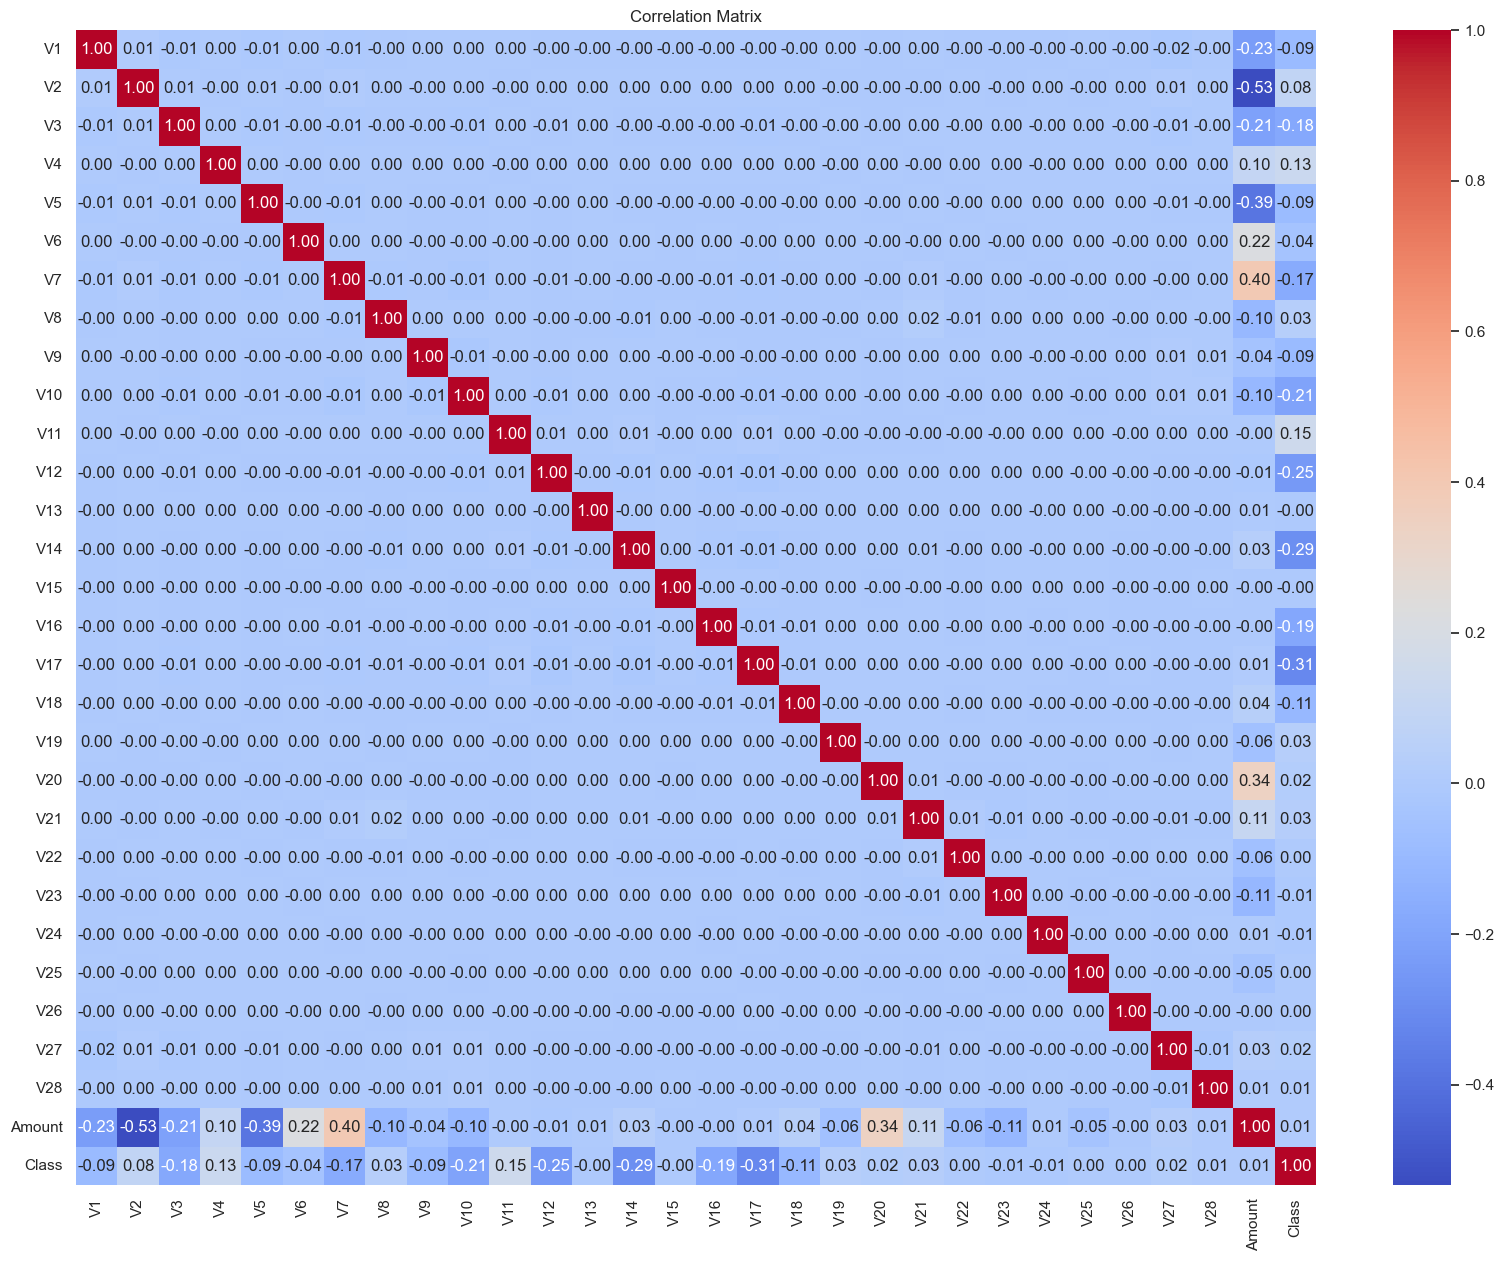

In [38]:
cm = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cm, cmap='coolwarm', annot= True, fmt = '.2f')
plt.title("Correlation Matrix")
plt.show()

In [71]:
## Writing a resunable function to evaludate the model
def evaluate_model(model,pred):
    test_acc=accuracy_score(y_test,pred)
    test_prec=precision_score(y_test,pred)
    test_recall=recall_score(y_test,pred)
    test_f1=f1_score(y_test,pred)

    print(f'Testing Accuracy: {test_acc}\n')
    print(f'Precision: {test_prec}\n')
    print(f'Recall: {test_recall}\n')
    print(f'F1 Score: {test_f1}\n')
    print(20*"====+")
    print(f'classification report:\n {classification_report(y_test,pred)}')
    cm=confusion_matrix(pred,y_test)
    sns.heatmap(cm,annot=True,fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel('Predicted Label')  # X-axis: model predictions
    plt.ylabel('Actual Label')  # Y-axis: 
    plt.show()
    print(20*"====+")
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, pred)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test, pred)

    # Plot ROC curve
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC AUC Curve (AUC = {auc_score:.2f})')
    plt.show()

    model_score = [train_acc, test_acc, test_prec, test_f1, test_recall, auc_score]
    return model_score

In [69]:
score = pd.DataFrame(index = ['Accuracy Test','Precision Test','Recall Test', 'F1 Test','roc auc score'])
score = score.sort_values(by='Accuracy Test', ascending=False, axis=1)

### Logistic Regression Model

In [64]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_lr_pred = lr_model.predict(x_test)

Testing Accuracy: 0.9575294346083917

Precision: 0.9806722223248766

Recall: 0.9337426766832633

F1 Score: 0.956632239225653

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+
classification report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     56463
           1       0.98      0.93      0.96     56839

    accuracy                           0.96    113302
   macro avg       0.96      0.96      0.96    113302
weighted avg       0.96      0.96      0.96    113302



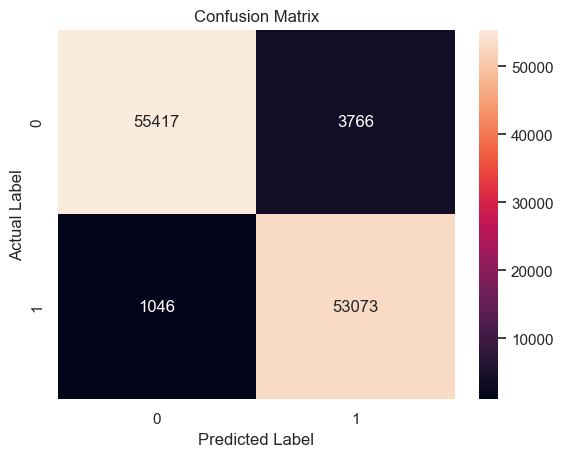

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+


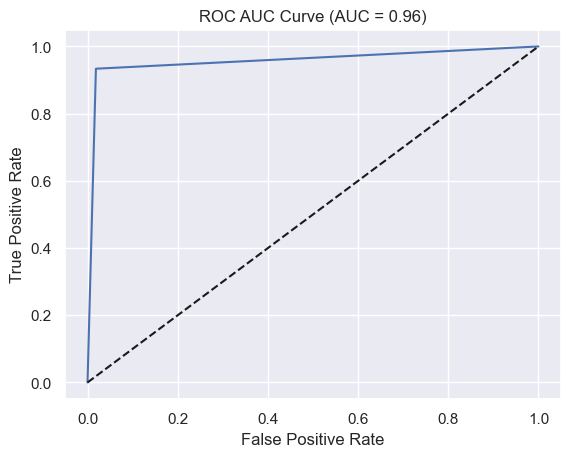

NameError: name 'train_acc' is not defined

In [72]:
lr_score = evaluate_model(lr_model,y_lr_pred)

In [43]:
score['Logistic Regression'] = lr_score
score

,Logistic Regression
Accuracy Test,0.957529
Precision Test,0.980672
Recall Test,0.956632
F1 Test,0.933743
roc auc score,0.957609


## Random Forest Classifier

In [44]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
y_rf_pred = rf_model.predict(x_test)

Testing Accuracy: 0.9999029143351397

Precision: 0.999806508355321

Recall: 1.0

F1 Score: 0.9999032448170009

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



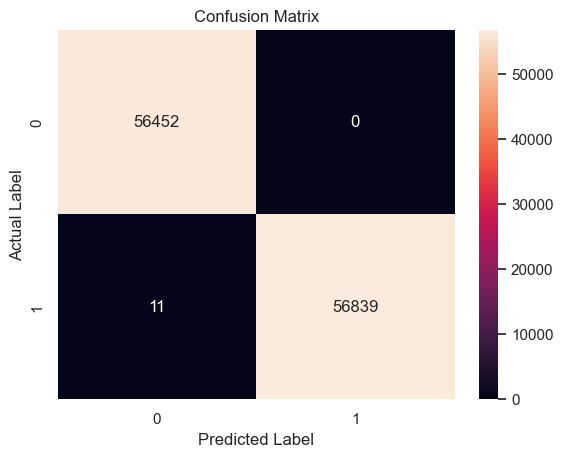

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+


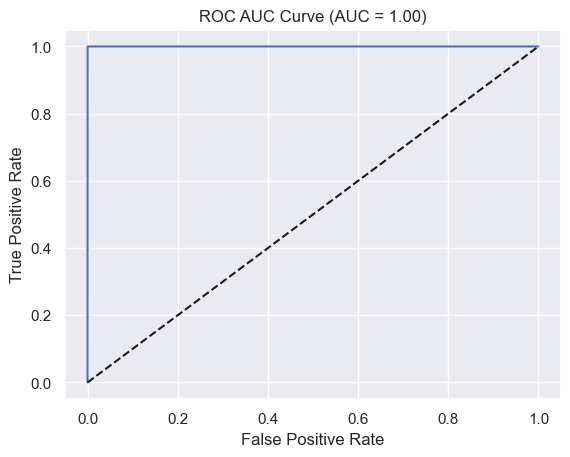

In [45]:
rf_score = evaluate_model(rf_model,y_rf_pred)

In [46]:
score['Random Forest'] = rf_score
score

,Logistic Regression,Random Forest
Accuracy Test,0.957529,0.999903
Precision Test,0.980672,0.999807
Recall Test,0.956632,0.999903
F1 Test,0.933743,1.000000
roc auc score,0.957609,0.999903


### XGBoost Model

In [47]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)
y_xgb_pred = xgb_model.predict(x_test)

Testing Accuracy: 0.9998146546398122

Precision: 0.9996306718255364

Recall: 1.0

F1 Score: 0.9998153018056448

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



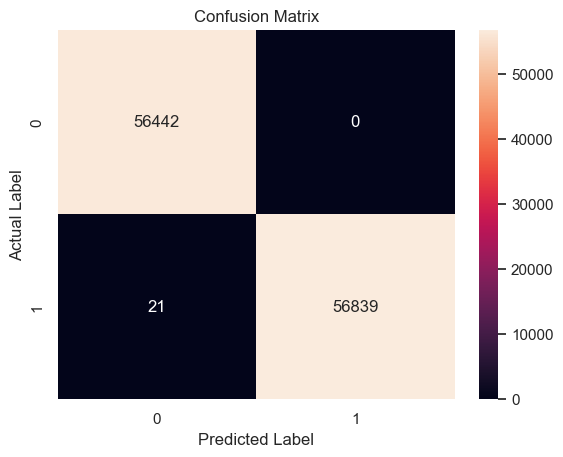

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+


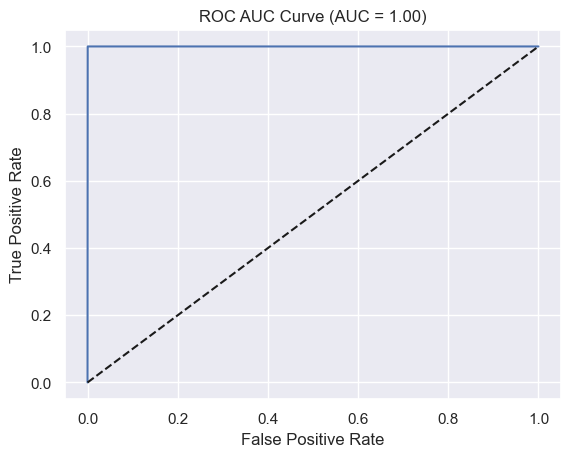

In [48]:
xgb_score = evaluate_model(xgb_model,y_xgb_pred)

In [49]:
score['XGBoost'] = xgb_score
score

,Logistic Regression,Random Forest,XGBoost
Accuracy Test,0.957529,0.999903,0.999815
Precision Test,0.980672,0.999807,0.999631
Recall Test,0.956632,0.999903,0.999815
F1 Test,0.933743,1.000000,1.000000
roc auc score,0.957609,0.999903,0.999814


## Decision Tree Model

In [50]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
y_dt_pred = dt_model.predict(x_test)

Testing Accuracy: 0.9979612010379341

Precision: 0.997259311314125

Recall: 0.9986804834708563

F1 Score: 0.9979693914327658

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



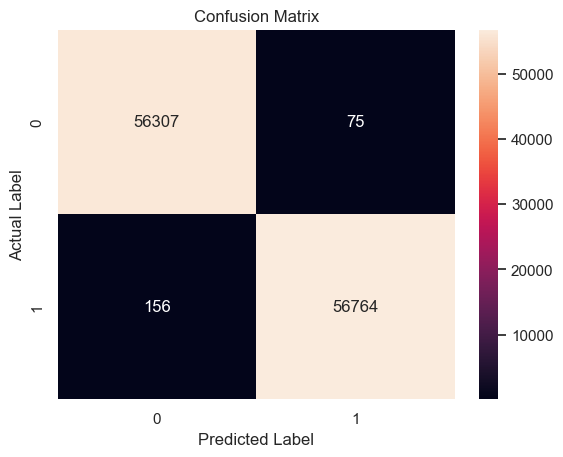

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+


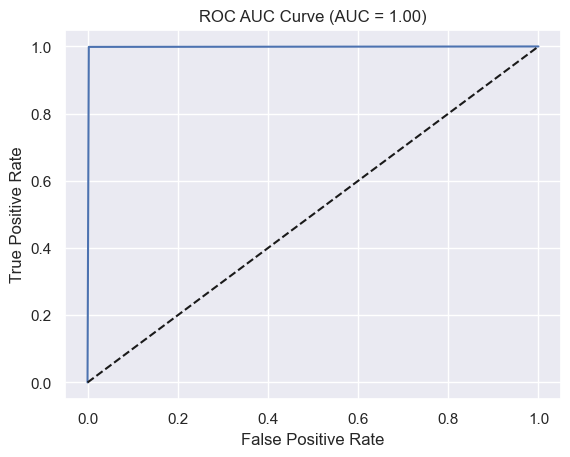

In [51]:
dt_score = evaluate_model(dt_model,y_dt_pred)

In [52]:
score['Decision Tree'] = dt_score
score

,Logistic Regression,Random Forest,XGBoost,Decision Tree
Accuracy Test,0.957529,0.999903,0.999815,0.997961
Precision Test,0.980672,0.999807,0.999631,0.997259
Recall Test,0.956632,0.999903,0.999815,0.997969
F1 Test,0.933743,1.000000,1.000000,0.998680
roc auc score,0.957609,0.999903,0.999814,0.997959


In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Determine the number of features (input dimension)
input_dim = x_train.shape[1]


# Build model
nn_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,321 (63.75 KB)

 Trainable params: 16,321 (63.75 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# Define Early Stopping
early_stopping_nn = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fitting the model using training data
history = nn_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=32, callbacks=[early_stopping_nn])

Epoch 1/50
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 8s 526us/step - accuracy: 0.9890 - loss: 0.0314 - val_accuracy: 0.9983 - val_loss: 0.0064
Epoch 2/50
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 7s 523us/step - accuracy: 0.9987 - loss: 0.0056 - val_accuracy: 0.9992 - val_loss: 0.0036
Epoch 3/50
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 7s 505us/step - accuracy: 0.9991 - loss: 0.0039 - val_accuracy: 0.9995 - val_loss: 0.0024
Epoch 4/50
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 7s 487us/step - accuracy: 0.9993 - loss: 0.0033 - val_accuracy: 0.9997 - val_loss: 0.0020
Epoch 5/50
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 7s 494us/step - accuracy: 0.9994 - loss: 0.0027 - val_accuracy: 0.9993 - val_loss: 0.0033
Epoch 6/50
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 7s 484us/step - accuracy: 0.9994 - loss: 0.0024 - val_accuracy: 0.9995 - val_loss: 0.0029
Epoch 7/50
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 7s 495us/step - accuracy: 0.9995 - loss: 0.0022 - val_accuracy: 0.9995 - val_loss: 0.0028
Epoch 8/50
14163/14163 ━━━━━━━━━━━━━━━━━━━━ 7s 488us/step - ac

In [55]:
## Evaludate the model with accuracy
loss, accuracy = nn_model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

3541/3541 ━━━━━━━━━━━━━━━━━━━━ 1s 296us/step - accuracy: 0.9998 - loss: 0.0016
Test Accuracy: 1.00


In [56]:
# Make predictions
y_pred_nn = nn_model.predict(x_test)

3541/3541 ━━━━━━━━━━━━━━━━━━━━ 1s 257us/step


In [57]:
# Convert the model's predicted probabilities into binary class labels (0 or 1)
## If probability > 0.5 → class 1 Else → class 0

y_pred = (y_pred_nn > 0.5).astype("int32")

Testing Accuracy: 0.9997528728530829

Precision: 0.9995251912424162

Recall: 0.9999824064462781

F1 Score: 0.9997537465700415

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56463
           1       1.00      1.00      1.00     56839

    accuracy                           1.00    113302
   macro avg       1.00      1.00      1.00    113302
weighted avg       1.00      1.00      1.00    113302



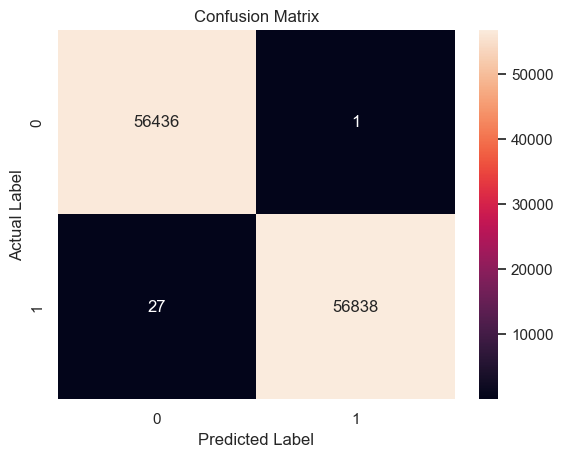

====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+====+


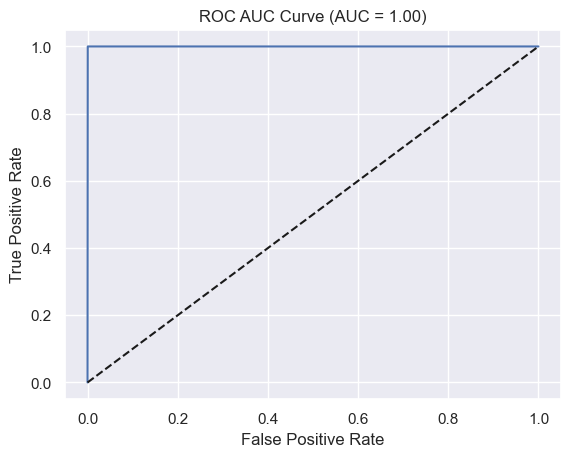

In [58]:
# Calculate metrics
test_acc_cnn = accuracy_score(y_test, y_pred)
test_prec_cnn = precision_score(y_test, y_pred)
test_recall_cnn = recall_score(y_test, y_pred)
test_f1_cnn = f1_score(y_test, y_pred)
auc_test_cnn = roc_auc_score(y_test, y_pred) # Use probabilities for AUC

nn_score = evaluate_model(nn_model,y_pred)

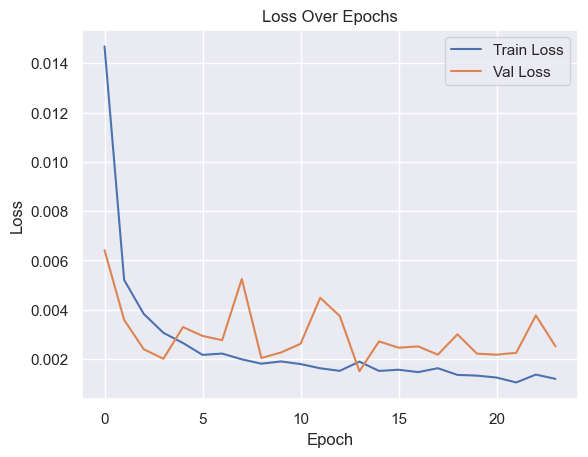

In [59]:
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [60]:
## Sensitivity (Recall or True Positive Rate) - 
## TPR = TP/TP + FN

## Specificity (True Negative Rate) - 
## TNR = TN/TN+FP

## Precision = TP/TP+FP

In [61]:
score['Neural network'] = nn_score
score.T

,Accuracy Test,Precision Test,Recall Test,F1 Test,roc auc score
Logistic Regression,0.957529,0.980672,0.956632,0.933743,0.957609
Random Forest,0.999903,0.999807,0.999903,1.000000,0.999903
XGBoost,0.999815,0.999631,0.999815,1.000000,0.999814
Decision Tree,0.997961,0.997259,0.997969,0.998680,0.997959
Neural network,0.999753,0.999525,0.999754,0.999982,0.999752
